# Contents:

[Background and Objective](#Background)

[Import and Warehouse data](#Data_Import)

[Data Cleansing](#Data_Cleansing)

[Data Analysis & Visualisation](#Analysis_Visualisation)

[Data Pre-processing](#Pre-processing)

[Model Training, Testing and Tuning](#Model)

[Conclusion and Improvisation](#Conclusion)


<a id='the_destination'></a>


<a id='Background'></a>

# Background and Objective

* **DOMAIN:** Healthcare
* **CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patients' details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
* **DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

1) P_incidence
2) P_tilt
3) L_angle
4) S_slope
5) P_radius
6) S_degree
7) Class

* **PROJECT OBJECTIVE:** Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd


import scipy.stats as st
from scipy.stats import ttest_1samp, ttest_ind, norm, t
from scipy.stats import zscore
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import label encoder

from sklearn.preprocessing import LabelEncoder   


# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt


# To see multiple outputs together

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id='Data_Import'></a>

# Import and Warehouse Data

#### Import and Dimension Check Individual Data-sets

In [2]:
# Read data

normal = pd.read_csv('Part1 - Normal.csv')
type_h = pd.read_csv('Part1 - Type_H.csv')
type_s = pd.read_csv('Part1 - Type_S.csv')


In [3]:
# Shape and size of each data

print("The 'normal' data frame has {} rows / observations and {} columns / features".format(normal.shape[0],normal.shape[1]))
print()
print("The 'type_h' data frame has {} rows / observations and {} columns / features".format(type_h.shape[0],type_h.shape[1]))
print()
print("The 'type_s' data frame has {} rows / observations and {} columns / features".format(type_s.shape[0],type_s.shape[1]))

The 'normal' data frame has 100 rows / observations and 7 columns / features

The 'type_h' data frame has 60 rows / observations and 7 columns / features

The 'type_s' data frame has 150 rows / observations and 7 columns / features


In [4]:
# Using head() to display few rows of the data

normal.head()
type_h.head()
type_s.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [8]:
# Data-types in individual data
normal.info()
print()
type_h.info()
print()
type_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-nul

* There is no missing data for any of the attributes for all the 3 datasets.
* All the numeric attributes are of float64 data-type while "Class", which is a nominal / categorical variable is of object data-type. Hence data-types are aligned.

So, we move ahead to merge the 3 data-sets. Here we stack or append the data-sets.

#### Data Merge and Dimension Check for Final Data

In [5]:
final_data = normal.append([type_h, type_s],ignore_index=True)
final_data.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [6]:
# Exploring shape and size of the final data

print("The final data has {} rows / observations and {} columns / features".format(final_data.shape[0],final_data.shape[1]))


The final data has 310 rows / observations and 7 columns / features


<a id='Data_Cleansing'></a>

# Data Cleansing

In [7]:
# Using info() to check for data-types and missing values

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


* The final dataset contains 310 rows which is the sum of the rows from individual datasets.

* The data-types for numeric variables is float64 and the categorical variable "Class" is object, same as the individual data-sets.

* All the 310 rows are non-null. In the individual data-sets also all the rows were non-null.

Hence, we conclude that the data merge has been fine - there is no missing data, the data-types are aligned and all the rows have been captured.

Now, we move ahead to do a frequency-check for type of class to ensure that while merging there has not been any mismatch.

We would expect 100 "Normal", 60 "Type_H" and 150 "Type_S" classes.

In [8]:
# Frequency check for different 'Class' types
final_data.Class.value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

The above output reveals that the values for the "Class" variable is incorrect and inconsistent. Hence, instead of 3 classes we are getting 6 classes in the final data-set.

We will correct these values. We rename as follows:
 * Class Normal to "Normal", 
 * Class Type_H to "Type_H" and 
 * Class Type_S to "Type_S"

In [9]:
# Correcting the "Class" variable values

final_data['Class'] = final_data['Class'].replace(['Nrmal','type_h','tp_s'],['Normal','Type_H','Type_S'])

In [10]:
# Frequency check for different 'Class' types

final_data.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

The final dataset now seems to be fine for further analysis. Hence we move forward with exploratory analysis of the data

The data does not have any missing / incorrect values.

<a id='Analysis_Visualisation'></a>

# Data Analysis & Visualisation

In [11]:
# Function to add percentage values to chart

def add_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show();

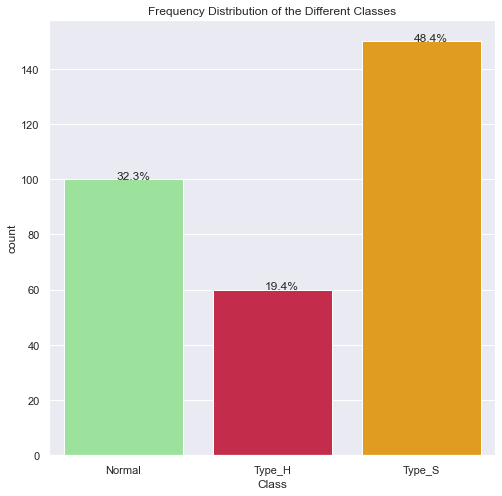

In [30]:
# Visualising frequency distribution of target variable 

sns.set(rc={"figure.figsize": (8, 8)});
ax=sns.countplot(final_data['Class'],palette=['lightgreen','crimson','Orange']);
plt.title('Frequency Distribution of the Different Classes');
add_percentage(ax,final_data.Class);

* Around 48% patients are Type_S patients and 32% are Normal. Rest 19% are Type_H patients.

In [12]:
#Using describe to understand the 5-point summary of Data

final_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


* For most of the features the mean is slightly greater or almost equal to the median indicating mild postive skewness or normality.
* However, for S_Degree the mean is much larger than the median which indicates high positive skewness.
* For P_radius the mean is slightly less than the median and that indicates that the distribution may have slight negative skewness.
* There are negative values in P_tilt and S_degree. However, at this stage, there is no reason to suspect this to be wrong data as tilt, degree are angular measures which could be negative.

Since k-nn is sensitive to outlier we will check for presence of outlier in data. Since we have 3 Classes - we visualise the outliers for each feature class-wise.

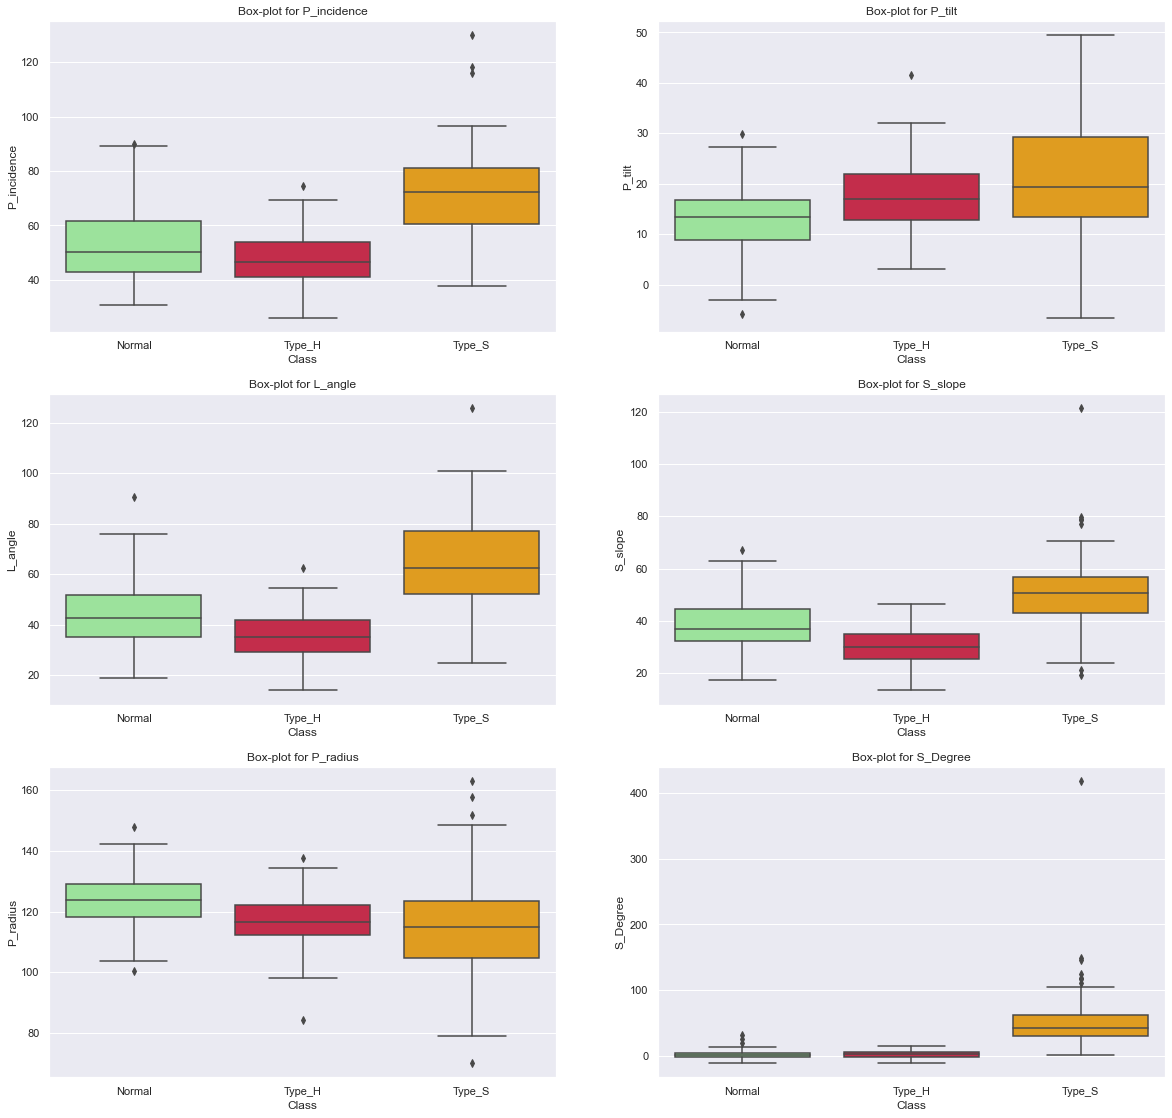

In [13]:
# Box-Plot to check outliers and study distribution of features class-wise

sns.set(rc={"figure.figsize": (20, 40)});

plt.subplot(6,2,1);
sns.boxplot(x=final_data['Class'],y=final_data['P_incidence'],palette=['lightgreen','crimson','Orange']);
plt.title('Box-plot for P_incidence');

plt.subplot(6,2,2);
sns.boxplot(x=final_data['Class'],y=final_data['P_tilt'],palette=['lightgreen','crimson','Orange']);
plt.title('Box-plot for P_tilt');

plt.subplot(6,2,3);
sns.boxplot(x=final_data['Class'],y=final_data['L_angle'],palette=['lightgreen','crimson','Orange']);
plt.title('Box-plot for L_angle');

plt.subplot(6,2,4);
sns.boxplot(x=final_data['Class'],y=final_data['S_slope'],palette=['lightgreen','crimson','Orange']);
plt.title('Box-plot for S_slope');

plt.subplot(6,2,5);
sns.boxplot(x=final_data['Class'],y=final_data['P_radius'],palette=['lightgreen','crimson','Orange']);
plt.title('Box-plot for P_radius');

plt.subplot(6,2,6);
sns.boxplot(x=final_data['Class'],y=final_data['S_Degree'],palette=['lightgreen','crimson','Orange']);
plt.title('Box-plot for S_Degree');

* There's presence of outliers for all of the features.
* For most of the features, the distribution of Type_S seems to be different from Normal and Type_H.

Due to sensitivity of k-nn towards outliers we will do an class-wsie outlier treatment to the data.

In [14]:
# Subsetting data based on each class

df1 = final_data.copy()

df_normal = df1[df1['Class'] == 'Normal']
df_H = df1[df1['Class'] == 'Type_H']
df_S = df1[df1['Class'] == 'Type_S']

# Dropping the 'Class' variable from each data

df_normal=df_normal.drop(['Class'], axis = 1)
df_H=df_H.drop(['Class'], axis = 1)
df_S=df_S.drop(['Class'], axis = 1)

# Computing IQR for each data

Q1_normal = df_normal.quantile(0.25)
Q3_normal = df_normal.quantile(0.75)
IQR_normal = Q3_normal - Q1_normal

Q1_H = df_H.quantile(0.25)
Q3_H = df_H.quantile(0.75)
IQR_H = Q3_H - Q1_H

Q1_S = df_S.quantile(0.25)
Q3_S = df_S.quantile(0.75)
IQR_S = Q3_S - Q1_S

# Outlier treatment

df_normal_outtreat = df_normal.copy()
df_H_outtreat = df_H.copy()
df_S_outtreat = df_S.copy()


# Replace every outlier on the lower side by the lower whisker in each data
for i, j in zip(np.where(df_normal_outtreat < Q1_normal - 1.5 * IQR_normal)[0], np.where(df_normal_outtreat < Q1_normal - 1.5 * IQR_normal)[1]): 
    
    whisker  = Q1_normal - 1.5 * IQR_normal
    df_normal_outtreat.iloc[i,j] = whisker[j]
    
    
for i, j in zip(np.where(df_H_outtreat < Q1_H - 1.5 * IQR_H)[0], np.where(df_H_outtreat < Q1_H - 1.5 * IQR_H)[1]): 
    
    whisker  = Q1_H - 1.5 * IQR_H
    df_H_outtreat.iloc[i,j] = whisker[j]
    

for i, j in zip(np.where(df_S_outtreat < Q1_S - 1.5 * IQR_S)[0], np.where(df_S_outtreat < Q1_S - 1.5 * IQR_S)[1]): 
    
    whisker  = Q1_S - 1.5 * IQR_S
    df_S_outtreat.iloc[i,j] = whisker[j]
    
    
    
#Replace every outlier on the upper side by the upper whisker in each data
for i, j in zip(np.where(df_normal_outtreat > Q3_normal + 1.5 * IQR_normal)[0], np.where(df_normal_outtreat > Q3_normal + 1.5 * IQR_normal)[1]):
    
    whisker  = Q3_normal + 1.5 * IQR_normal
    df_normal_outtreat.iloc[i,j] = whisker[j]
                                      
                                      
for i, j in zip(np.where(df_H_outtreat > Q3_H + 1.5 * IQR_H)[0], np.where(df_H_outtreat > Q3_H + 1.5 * IQR_H)[1]):
    
    whisker  = Q3_H + 1.5 * IQR_H
    df_H_outtreat.iloc[i,j] = whisker[j]
    

for i, j in zip(np.where(df_S_outtreat > Q3_S + 1.5 * IQR_S)[0], np.where(df_S_outtreat > Q3_S + 1.5 * IQR_S)[1]):
    
    whisker  = Q3_S + 1.5 * IQR_S
    df_S_outtreat.iloc[i,j] = whisker[j]
    
# Final data after outlier treatment
    
df_normal_outtreat['Class']='Normal'
df_H_outtreat['Class']='Type_H'
df_S_outtreat['Class']='Type_S'
    
data = df_normal_outtreat.append([df_H_outtreat, df_S_outtreat],ignore_index=True)
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [15]:
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.398796,17.528875,51.846652,42.793355,117.917870,24.835096
std,16.914967,9.944835,18.339787,12.696040,12.949219,29.392043
min,26.147921,-6.554948,14.000000,13.366931,76.760942,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,111.702528,49.431864,114.477309,76.938366,151.283127,109.146156


* The mean of S_Degree has decreased by 5%. For other features there's slight decrease in mean.

The outliers have now been removed. We will perform other exploratory analyses on the new data.

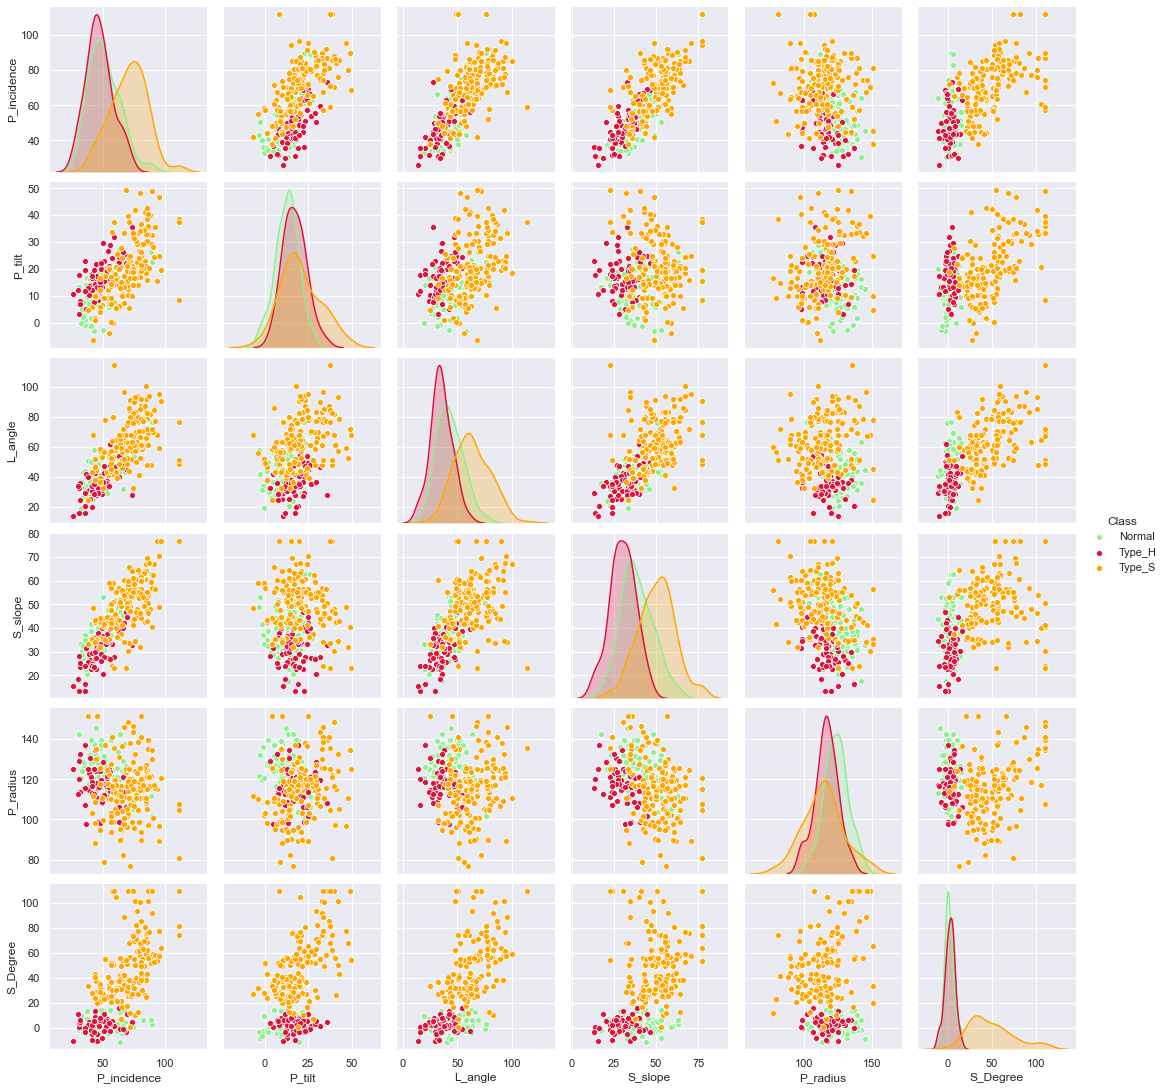

In [16]:
# Bivariate Analysis Class-wise

sns.pairplot(data=data,hue='Class',palette=['lightgreen','crimson','Orange']);

* P_incidence has a positive linear relationship with most of the other independent variables.
* Other than P_incidence, L_angle also exhibits a positive relationship with S_Slope.
* S_degree has some positive relationship with most of the other features and it seems that Type_S is driving this linearity.
* P_radius has a negative linear relationship with S_Slope and P_incidence.
* We will delve deeper into the degree of the relationships through correlation analysis.
* Type_S is very easily distinguishable despite some overlap in the distribution with Normal and Type_H.
* For most variables Normal and Type_H have very similar type of distribution and not easily distinguishable in the bivariate analysis.

To understand the strength of relationship we perform correlation analysis for the predictors. We perform it for both the original data and the outlier-treated data to understand the difference.

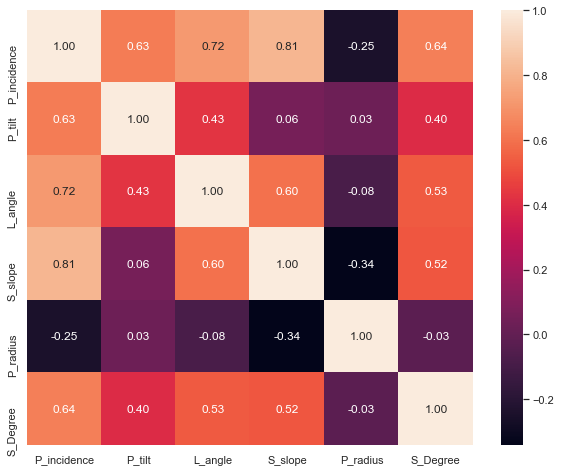

In [17]:
# Correlation on Original data

f,ax=plt.subplots(figsize=(10,8));
sns.heatmap(final_data.corr(),annot=True,fmt='.2f');
plt.show();


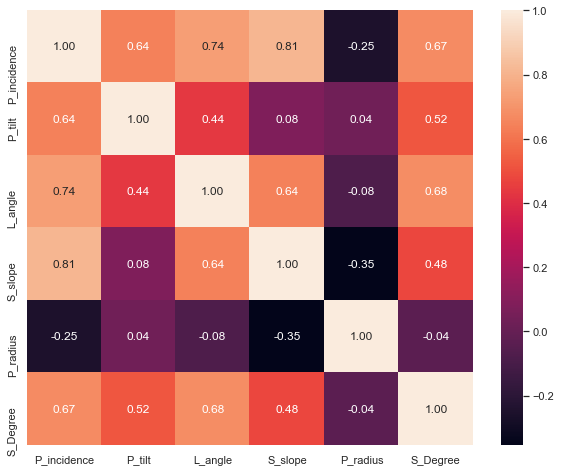

In [18]:
# Correlation on Outlier treated data

f,ax=plt.subplots(figsize=(10,8));
sns.heatmap(data.corr(),annot=True,fmt='.2f');
plt.show();


* The two plots show that there's minor difference between the strength of relationship between the two datasets. With the outlier treated data as reference, the observations are as follows:
* P_incidence has very strong positive relationship with S_slope and L_angle and moderattely strong relationship with P_tilt and S_degree.
* Other than P_incidence, L_angle has a moderate positive relationship with S_Degree and S_Slope.
* S_Degree has moderate positive relationship with most of the other features. From above visual, it seems that this is driven by Type_S.
* S_slope has a weak negative relationship with P_radius.

#### Selection of Independent Variables:

Since the number of independent variables is 6, we do not require any dimension reduction. However, we would still want to check if all the independent variables have significance i.e. if any independent variable does not have any association with dependent variable we may drop the same. Also, if an independent variable does not have much variation in the data we may drop that.

To check the above we perform ANOVA and compute the co-effiecient of variation.

* We perform Analysis of Variance for all the independent variables with the 'Class' variable to check if the independent variables vary across the 3 classes. Since we test here the association between categorical and continuous variable, we do not go for a pearson correlation. Instead we go for an ANOVA test. Though, this test may not give a degree of association, a postive test (p-value less than 0.05) will suggest that independent variables vary by class.

* We assume the population to be normal, have same variance and samples are random and independent.
* If we find that any independent variable does not vary across dependent variable we may drop that variable from our analysis.

In [19]:
# ANOVA on Original Data
 
mod = ols('P_incidence ~ Class', data = final_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV P_incidence : \n',aov_table)
print()


mod = ols('P_tilt ~ Class', data = final_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV P_tilt : \n',aov_table)
print()

mod = ols('L_angle ~ Class', data = final_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV L_angle : \n',aov_table)
print()

mod = ols('S_slope ~ Class', data = final_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV S_slope : \n',aov_table)
print()

mod = ols('P_radius ~ Class', data = final_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV P_radius : \n',aov_table)
print()

mod = ols('S_Degree ~ Class', data = final_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV S_Degree : \n',aov_table)

AOV P_incidence : 
                 sum_sq     df          F        PR(>F)
Class     35892.191585    2.0  98.539709  8.752849e-34
Residual  55910.976950  307.0        NaN           NaN

AOV P_tilt : 
                 sum_sq     df          F        PR(>F)
Class      3771.425079    2.0  21.299194  2.176879e-09
Residual  27180.077360  307.0        NaN           NaN

AOV L_angle : 
                 sum_sq     df          F        PR(>F)
Class     45556.786013    2.0  114.98284  5.357329e-38
Residual  60817.480453  307.0        NaN           NaN

AOV S_slope : 
                 sum_sq     df          F        PR(>F)
Class     20526.825851    2.0  89.643953  2.175670e-31
Residual  35148.692713  307.0        NaN           NaN

AOV P_radius : 
                 sum_sq     df          F        PR(>F)
Class      5425.586931    2.0  16.866935  1.121996e-07
Residual  49376.345258  307.0        NaN           NaN

AOV S_Degree : 
                  sum_sq     df           F        PR(>F)
Class     19

In [20]:
# ANOVA on Outlier treated data
 
mod = ols('P_incidence ~ Class', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV P_incidence : \n',aov_table)
print()


mod = ols('P_tilt ~ Class', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV P_tilt : \n',aov_table)
print()

mod = ols('L_angle ~ Class', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV L_angle : \n',aov_table)
print()

mod = ols('S_slope ~ Class', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV S_slope : \n',aov_table)
print()

mod = ols('P_radius ~ Class', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV P_radius : \n',aov_table)
print()

mod = ols('S_Degree ~ Class', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('AOV S_Degree : \n',aov_table)

AOV P_incidence : 
                 sum_sq     df           F        PR(>F)
Class     35296.792688    2.0  102.009842  1.072913e-34
Residual  53113.087848  307.0         NaN           NaN

AOV P_tilt : 
                 sum_sq     df         F        PR(>F)
Class      3759.128443    2.0  21.53011  1.777570e-09
Residual  26800.894447  307.0       NaN           NaN

AOV L_angle : 
                 sum_sq     df           F        PR(>F)
Class     45545.319863    2.0  119.740858  3.613105e-39
Residual  58386.141035  307.0         NaN           NaN

AOV S_slope : 
                 sum_sq     df           F        PR(>F)
Class     19855.171606    2.0  101.753876  1.251357e-34
Residual  29952.361031  307.0         NaN           NaN

AOV P_radius : 
                 sum_sq     df          F        PR(>F)
Class      5462.174707    2.0  18.088759  3.746281e-08
Residual  46351.649294  307.0        NaN           NaN

AOV S_Degree : 
                  sum_sq     df           F        PR(>F)
Class 

* The p-values for all independent variables are less than 0.05 and hence we can conclude that the means of the independent variables are not same across the 3 classes and hence the distribution of independent variables vary across classes.

* We do not remove any independent variables.

From 5-point summary of data we have seen there's variation in all the features. However, since here we are comparing the variation we use CV since it's unit-free.

In [21]:
# Compute the co-effcient of variation
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

# On original data

df=final_data.copy()
df=df.drop(['Class'], axis = 1)
cv(df)

# On outlier treated data

df=data.copy()
df=df.drop(['Class'], axis = 1)
cv(df)


P_incidence     28.491692
P_tilt          57.050857
L_angle         35.728349
S_slope         31.250070
P_radius        11.293507
S_Degree       142.827938
dtype: float64

P_incidence     28.005471
P_tilt          56.734020
L_angle         35.373136
S_slope         29.668250
P_radius        10.981558
S_Degree       118.348823
dtype: float64

* S_Degree has the maximum variation across data. Other features also have variation across data. Hence we do not remove any.

* P_radius has very less variation compared to others, however, we saw from ANOVA that P_radius also varies as per class. hence we do not remove.

<a id='Pre-processing'></a>

# Data Pre-processing

#### Original Data Pre-processing

In [22]:
# Segregate predictors vs target attributes

X = final_data.drop(labels= "Class" , axis = 1)
y = final_data["Class"]
X.head(1)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683


In [23]:
# Perform normalisation or scaling

# Since k-nn is distanced based algorithm we need to scale the data to make the predictors unit-free. Here we use z-scores.

XScaled  = X.apply(zscore) 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,8.702716e-17,2.326096e-16,1.980495e-16,5.121351e-17,-6.274551e-16,-8.156558e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


The 5-point summary shows that means are near 0 and standard deviations are approximately 1.

In [24]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=3)

print("{0:0.2f}% data is in training set".format((len(X_train)/len(XScaled.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(XScaled.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [25]:
# Check for target balance in all 3 data-sets

print("Original Normal Values    : {0} ({1:0.2f}%)".format(len(final_data.loc[final_data['Class'] == 'Normal']), (len(final_data.loc[final_data['Class'] == 'Normal'])/len(final_data.index)) * 100))
print("Original Type_H Values    : {0} ({1:0.2f}%)".format(len(final_data.loc[final_data['Class'] == 'Type_H']), (len(final_data.loc[final_data['Class'] == 'Type_H'])/len(final_data.index)) * 100))
print("Original Type_S Values    : {0} ({1:0.2f}%)".format(len(final_data.loc[final_data['Class'] == 'Type_S']), (len(final_data.loc[final_data['Class'] == 'Type_S'])/len(final_data.index)) * 100))

print("")

print("Training Normal Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'Normal']), (len(y_train[y_train[:] == 'Normal'])/len(y_train)) * 100))
print("Training Type_H Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'Type_H']), (len(y_train[y_train[:] == 'Type_H'])/len(y_train)) * 100))
print("Training Type_S Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'Type_S']), (len(y_train[y_train[:] == 'Type_S'])/len(y_train)) * 100))

print("")

print("Test Normal Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'Normal']), (len(y_test[y_test[:] == 'Normal'])/len(y_test)) * 100))
print("Test Type_H Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'Type_H']), (len(y_test[y_test[:] == 'Type_H'])/len(y_test)) * 100))
print("Test Type_S Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'Type_S']), (len(y_test[y_test[:] == 'Type_S'])/len(y_test)) * 100))


Original Normal Values    : 100 (32.26%)
Original Type_H Values    : 60 (19.35%)
Original Type_S Values    : 150 (48.39%)

Training Normal Values    : 79 (31.85%)
Training Type_H Values    : 48 (19.35%)
Training Type_S Values    : 121 (48.79%)

Test Normal Values        : 21 (33.87%)
Test Type_H Values        : 12 (19.35%)
Test Type_S Values        : 29 (46.77%)


* The target variable "Class" is imbalanced. Since this is a 3-class problem we would expect around 33% data points for each class. While "Normal" seems fine, the imbalance is mainly between Type_H and Type_S.

* However, imbalance didn't cause any issue in the test-train split as we see similar distribution of the target variable across all the 3 data-sets.

<a id='Model'></a>

# Model Training, Testing and Tuning

#### Design and train a KNN classifier and Display the classification accuracies for train and test data

In [26]:

# Building a knn model with 5 neighbours

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
y_pred=knn5.predict(X_test)

# Accuracies on train and test data

y_pred_train = knn5.predict(X_train)
print("The accuracy on test data with k=5 is ",accuracy_score(y_test, y_pred))
print("The accuracy on train data with k=5 is ",accuracy_score(y_train, y_pred_train))


KNeighborsClassifier()

The accuracy on test data with k=5 is  0.7903225806451613
The accuracy on train data with k=5 is  0.8508064516129032


* The accuracy for both train and test data looks fine at 85% and 79% respectively.
* We can vary the value of k to check whether we get a better accuracy. We will use odd number for k to avoid ties.
* Also, k-nn is sensitive to outliers. Hence, we will use outlier treated dataset to check for better accuracy.
* However, before testing for other values of k or any other tuning, we will check other metrices of confusion matrix.

#### Display and explain the classification report in detail

Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.67      0.86      0.75        21
      Type_H       0.70      0.58      0.64        12
      Type_S       0.96      0.83      0.89        29

    accuracy                           0.79        62
   macro avg       0.78      0.76      0.76        62
weighted avg       0.81      0.79      0.79        62



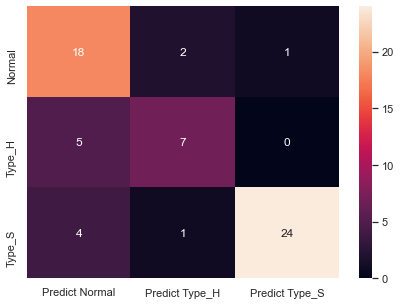

In [27]:
# Confusion matrix and Classification report


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=["Normal", "Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True);


report = classification_report(y_test,y_pred,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report);

* In terms of precision : Normal has a precison on 67%, Type_H has 70% and Type_S has 96%. Precision expresses the proportion of the data points our model says was relevant actually were relevant and is expressed as (TP/TP+FP). Hence we can say that 97% of the predicted Type_S patients are actually Type_S patients, 70% of the predicted Type_H patients are actually Type_H patients and 67% of the predicted Normal people are actually Normal people. Hence, model captures the relevance of Type_S very well, for Type_H and Normal it is average to good.

* In terms of recall : Normal has recall of 86%, Type_H has 58% and Type_S has 83%. Recall or True Positive Rate is the ability of a model to find all the positive cases within a dataset. Since this is a medical data-set we would prefer to identify patients. However, in this model Type_H has only 58% recall which means only 58% patients with disease type Type_H is correctly identified. This does not seem to be a good sign. Hence we will move ahead and see how we can tune our model.

* We majorly will look into Recall since the aim is to identify the patients. However, we will also look into precision to some extent. We have two types of diseases and it is important to identfy the patients under the correct type for better treatment.

#### Tuning with Outlier Treated Data-set

We follow the same steps as we did with the original data-set, i.e.we
1. seggregate the predictors and target,
2. perform test-train split,
3. train the k-nn model,
4. check accuracies and other classifucation measures.

#### Tuning Principle

Since k-nn is sensitive to outlier we expect the model to perform better once applied on outlier treated data. If so we will move ahead with tuning the value of k and will also try with different distance measures.

In [28]:
# Target-Predictor seggregation and scaling

X = data.drop(labels= "Class" , axis = 1)
y = data["Class"]
X.head(1)

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,7.259426e-16,-1.745020e-16,8.344580e-17,1.969751e-17,-1.484117e-15,3.295751e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-2.028160e+00,-2.425657e+00,-2.066973e+00,-2.321511e+00,-3.183472e+00,-1.223165e+00
25%,-8.271424e-01,-6.911025e-01,-8.108413e-01,-7.452329e-01,-5.575879e-01,-7.916745e-01
50%,-1.011246e-01,-1.179587e-01,-1.247532e-01,-3.064508e-02,2.709622e-02,-4.453004e-01
75%,7.389358e-01,4.624454e-01,6.091337e-01,7.812313e-01,5.839743e-01,5.606571e-01
max,3.037941e+00,3.213182e+00,3.420537e+00,2.693771e+00,2.580789e+00,2.873137e+00


In [29]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=3)

print("{0:0.2f}% data is in training set".format((len(X_train)/len(XScaled.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(XScaled.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [30]:
# Check for target balance in all 3 data-sets

print("Original Normal Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Class'] == 'Normal']), (len(data.loc[data['Class'] == 'Normal'])/len(data.index)) * 100))
print("Original Type_H Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Class'] == 'Type_H']), (len(data.loc[data['Class'] == 'Type_H'])/len(data.index)) * 100))
print("Original Type_S Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Class'] == 'Type_S']), (len(data.loc[data['Class'] == 'Type_S'])/len(data.index)) * 100))

print("")

print("Training Normal Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'Normal']), (len(y_train[y_train[:] == 'Normal'])/len(y_train)) * 100))
print("Training Type_H Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'Type_H']), (len(y_train[y_train[:] == 'Type_H'])/len(y_train)) * 100))
print("Training Type_S Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'Type_S']), (len(y_train[y_train[:] == 'Type_S'])/len(y_train)) * 100))

print("")

print("Test Normal Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'Normal']), (len(y_test[y_test[:] == 'Normal'])/len(y_test)) * 100))
print("Test Type_H Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'Type_H']), (len(y_test[y_test[:] == 'Type_H'])/len(y_test)) * 100))
print("Test Type_S Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'Type_S']), (len(y_test[y_test[:] == 'Type_S'])/len(y_test)) * 100))


Original Normal Values    : 100 (32.26%)
Original Type_H Values    : 60 (19.35%)
Original Type_S Values    : 150 (48.39%)

Training Normal Values    : 79 (31.85%)
Training Type_H Values    : 48 (19.35%)
Training Type_S Values    : 121 (48.79%)

Test Normal Values        : 21 (33.87%)
Test Type_H Values        : 12 (19.35%)
Test Type_S Values        : 29 (46.77%)


Similar explanation as above holds - All the datasets - Original, Training and Test are unbalanced wrt the 3 classes; however the distribution of the 3 classes across the 3 data-sets is almost similar.

In [31]:

# Building a knn model with 5 neighbours

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
y_pred=knn5.predict(X_test)

# Calculating accuracies on train and test data

y_pred_train = knn5.predict(X_train)
print("The accuracy on test data with k=5 is ",accuracy_score(y_test, y_pred))
print("The accuracy on train data with k=5 is ",accuracy_score(y_train, y_pred_train))




KNeighborsClassifier()

The accuracy on test data with k=5 is  0.8225806451612904
The accuracy on train data with k=5 is  0.875


* The accuracy on both train and test data has increased to 87% and 82% respectively.
* We will check for other classification metrices.

Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.69      0.86      0.77        21
      Type_H       0.78      0.58      0.67        12
      Type_S       0.96      0.90      0.93        29

    accuracy                           0.82        62
   macro avg       0.81      0.78      0.79        62
weighted avg       0.84      0.82      0.82        62



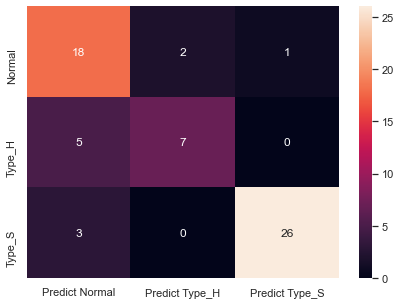

In [32]:
# Confusion matrix and Classification report


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=["Normal", "Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True);

report = classification_report(y_test,y_pred,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report);



* In terms of precision : Normal has a precison on 69%, Type_H has 78% and Type_S has 96%. Hence we can say that 96% of the predicted Type_S patients are actually Type_S patients, 78% of the predicted Type_H patients are actually Type_H patients and 69% of the predicted Normal people are actually Normal people. Hence, model captures the relevance of Type_S very well, for Type_H and Normal it is average to good.

* In terms of recall : Normal has recall of 86%, Type_H has 58% and Type_S has 90%. Since this is a mdeical data-set we would prefer to identify patients correctly. However, in this model Type_H has only 58% recall which means only 58% patients with disease type Type_H is correctly identified.

* In comparison to our model with original data, with treatment of outlier the model has improved interms of accuracy for both train and test data and also in terms of other accuracy metrices.

* However, the True Positive Rate for Type_H does not show any improvement. This remains the cause of worry and we will proceed with other values of k as tuning.

#### Automate the task of finding best values of K for KNN

In [33]:
# creating odd list of K for KNN
myList = list(range(3,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))


In [34]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=29)

The optimal number of neighbors is 5


In [35]:
# Checking the miss-classification error for each k

k_MSE = (np.column_stack([neighbors, MSE]))
print(k_MSE)

[[ 3.          0.22580645]
 [ 5.          0.17741935]
 [ 7.          0.17741935]
 [ 9.          0.20967742]
 [11.          0.19354839]
 [13.          0.20967742]
 [15.          0.22580645]
 [17.          0.25806452]
 [19.          0.24193548]
 [21.          0.24193548]
 [23.          0.22580645]
 [25.          0.27419355]
 [27.          0.25806452]
 [29.          0.25806452]]


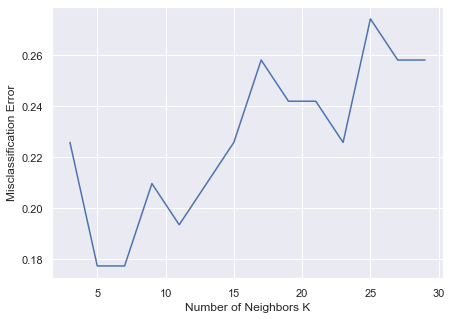

In [36]:
# plot misclassification error vs k

plt.figure(figsize = (7,5));
plt.plot(neighbors, MSE);
plt.xlabel('Number of Neighbors K');
plt.ylabel('Misclassification Error');
plt.show();

* To tune our model we will try with different values of k. From automation of finding best k-values we found that for k=7 the MSE is minimum and same as that of k=5. Hence will try with k=7.

* Other ways could be to try with different types of distances. k-nn is a distance based algorithm. By default, Python carries out analysis with Euclidean distance (Minkowski with p=2 is Euclidean). We will try other distances.

With k=5 and k=7 we have same MSE. Hence accuracy will also be same. But will check if other measures change.

In [37]:
# Building a knn model with 7 neighbours

knn7=KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train,y_train)
y_pred7=knn7.predict(X_test)

y_pred_train7 = knn7.predict(X_train)
print("The test accuracy with k=7 is ", accuracy_score(y_test, y_pred7))
print("The train accuracy with k=7 is ", accuracy_score(y_train, y_pred_train7))


KNeighborsClassifier(n_neighbors=7)

The test accuracy with k=7 is  0.8225806451612904
The train accuracy with k=7 is  0.8629032258064516


Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.68      0.90      0.78        21
      Type_H       0.75      0.50      0.60        12
      Type_S       1.00      0.90      0.95        29

    accuracy                           0.82        62
   macro avg       0.81      0.77      0.77        62
weighted avg       0.84      0.82      0.82        62



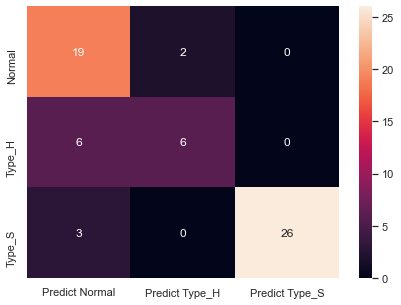

In [38]:
print("Confusion Matrix")
cm7=metrics.confusion_matrix(y_test, y_pred7, labels=["Normal", "Type_H","Type_S"])

df_cm7 = pd.DataFrame(cm7, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm7, annot=True);


report7 = classification_report(y_test,y_pred7,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report7);


* The test accuracy is same at 82%.
* Recall for Type_H has gone down to 50%. This means that for k=7 the model fails to identify 8% more patients with Type_H
* Hence, we say that our model with k=5 was better than k=7 though accuracy and MSE for both are same.
* We will try with k=9. Though, for k=9 the MSE is higher than that for k=5 or k=7, we will check if the model performs better in identifying patients better.

The test accuracy with k=9 is  0.7903225806451613
The train accuracy with k=9 is  0.8629032258064516
Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.67      0.86      0.75        21
      Type_H       0.60      0.50      0.55        12
      Type_S       1.00      0.86      0.93        29

    accuracy                           0.79        62
   macro avg       0.76      0.74      0.74        62
weighted avg       0.81      0.79      0.79        62



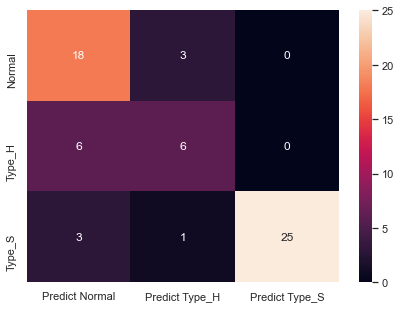

In [39]:
# Building a knn model with 9 neighbours

knn9=KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train,y_train)
y_pred9=knn9.predict(X_test)

y_pred_train9 = knn9.predict(X_train)
print("The test accuracy with k=9 is ", accuracy_score(y_test, y_pred9))
print("The train accuracy with k=9 is ", accuracy_score(y_train, y_pred_train9))

print("Confusion Matrix")
cm9=metrics.confusion_matrix(y_test, y_pred9, labels=["Normal", "Type_H","Type_S"])

df_cm9 = pd.DataFrame(cm9, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm9, annot=True);


report9 = classification_report(y_test,y_pred9,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report9);

* There is no improvement in terms of identifying more patients through this model. Hence we conclude that the best model was with k=5.

We now move forward with different distances keeping k=5.

The test accuracy is  0.8064516129032258
The train accuracy is  0.8790322580645161
Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.69      0.86      0.77        21
      Type_H       0.60      0.50      0.55        12
      Type_S       1.00      0.90      0.95        29

    accuracy                           0.81        62
   macro avg       0.76      0.75      0.75        62
weighted avg       0.82      0.81      0.81        62



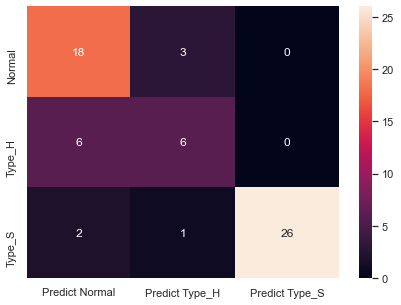

In [40]:
tune1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=4)

tune1.fit(X_train,y_train)
y_pred_tune1=tune1.predict(X_test)

y_pred_train_tune1 = tune1.predict(X_train)
print("The test accuracy is ", accuracy_score(y_test, y_pred_tune1))
print("The train accuracy is ", accuracy_score(y_train, y_pred_train_tune1))


print("Confusion Matrix")
cm_tune1=metrics.confusion_matrix(y_test, y_pred_tune1, labels=["Normal", "Type_H","Type_S"])

df_cm_tune1 = pd.DataFrame(cm_tune1, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm_tune1, annot=True);


report_tune1 = classification_report(y_test,y_pred_tune1,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report_tune1);


0.7903225806451613
0.875
Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.64      0.86      0.73        21
      Type_H       0.62      0.42      0.50        12
      Type_S       1.00      0.90      0.95        29

    accuracy                           0.79        62
   macro avg       0.76      0.72      0.73        62
weighted avg       0.81      0.79      0.79        62



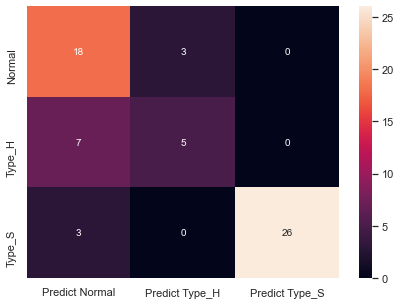

In [81]:
tune2=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=3)

tune2.fit(X_train,y_train)
y_pred_tune2=tune2.predict(X_test)

y_pred_train_tune2 = tune2.predict(X_train)
print(accuracy_score(y_test, y_pred_tune2))
print(accuracy_score(y_train, y_pred_train_tune2))


print("Confusion Matrix")
cm_tune2=metrics.confusion_matrix(y_test, y_pred_tune2, labels=["Normal", "Type_H","Type_S"])

df_cm_tune2 = pd.DataFrame(cm_tune2, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm_tune2, annot=True);


report_tune2 = classification_report(y_test,y_pred_tune2,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report_tune2);

0.8064516129032258
0.8790322580645161
Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

      Normal       0.67      0.86      0.75        21
      Type_H       0.78      0.58      0.67        12
      Type_S       0.96      0.86      0.91        29

    accuracy                           0.81        62
   macro avg       0.80      0.77      0.78        62
weighted avg       0.83      0.81      0.81        62



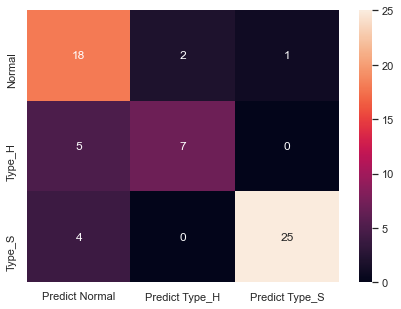

In [41]:
tune3=KNeighborsClassifier(n_neighbors=5,metric='manhattan',p=3)

tune3.fit(X_train,y_train)
y_pred_tune3=tune3.predict(X_test)

y_pred_train_tune3 = tune3.predict(X_train)
print(accuracy_score(y_test, y_pred_tune3))
print(accuracy_score(y_train, y_pred_train_tune3))


print("Confusion Matrix")
cm_tune3=metrics.confusion_matrix(y_test, y_pred_tune3, labels=["Normal", "Type_H","Type_S"])

df_cm_tune3 = pd.DataFrame(cm_tune3, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm_tune3, annot=True);


report_tune3 = classification_report(y_test,y_pred_tune3,labels=["Normal", "Type_H","Type_S"]);
print('Classification report : \n',report_tune3);

* All the above tuning suggests similar kind of results without much of improvement. Hence comparing all the models we choose the one performed on outlier treated data with distance as Euclidean and k=5.

In [42]:
# Prediction for the test data

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
y_pred=knn5.predict(X_test)

Prediction = (np.column_stack([y_test, y_pred]))
print(Prediction)

KNeighborsClassifier()

[['Type_H' 'Normal']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Normal']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Normal' 'Type_H']
 ['Type_S' 'Type_S']
 ['Normal' 'Normal']
 ['Type_H' 'Normal']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Type_S' 'Type_S']
 ['Type_S' 'Normal']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_S' 'Type_S']
 ['Type_H' 'Type_H']
 ['Type_H' 'Type_H']
 ['Normal' 'Normal']
 ['Type_H' 'Type_H']
 ['Normal' 'Type_S']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Normal' 'Normal']
 ['Type_S' 'Type_S']
 ['Normal' 'Normal']
 ['Type_S' 'Type_S']
 ['Normal' 'Normal']
 ['Type_S' 'Type_S']
 ['Normal' 'Normal']
 ['Type_S' 'Type_S']
 ['Normal' 'Normal']
 ['Normal' 'N

<a id='Conclusion'></a>

# Conclusion and Improvisation

Before concluding we conclude one last step to derive the strength of association between "Class" and predictors. Since we do not get any feature importance through k-nn, this way we can intuitively comment on the same.

We know, "Class" is a ctegorical variable and all the features are continuous. Hence we use point biseral correlation. It is similar to that of Pearson correlation, however, in Python we will also get the significance of the same through p-value. Previously, through our ANOVA test we have already proved that "Class" has significant association with all the predictors.

We did not use this earlier as we wanted to use this on the final data to kind of comment on the feature importance and not use this for feature selection.

In [43]:
# Converting to numeric

data1=data.copy()

cleanup = {"Class":     {"Normal": 0, "Type_H": 1, "Type_S": 2}}
data1 = data1.replace(cleanup)
data1.head(2)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0


In [44]:
# Computing correlation

st.pointbiserialr(data1.Class, data1.S_Degree)
st.pointbiserialr(data1.Class, data1.P_radius)
st.pointbiserialr(data1.Class, data1.S_slope)
st.pointbiserialr(data1.Class, data1.L_angle)
st.pointbiserialr(data1.Class, data1.P_tilt)
st.pointbiserialr(data1.Class, data1.P_incidence)

PointbiserialrResult(correlation=0.738750439169158, pvalue=1.025063097873357e-54)

PointbiserialrResult(correlation=-0.31582938885794887, pvalue=1.31243031750354e-08)

PointbiserialrResult(correlation=0.445792550907104, pvalue=1.5295621779760593e-16)

PointbiserialrResult(correlation=0.5330027710153116, pvalue=3.7595544079004016e-24)

PointbiserialrResult(correlation=0.35014511196050924, pvalue=2.2691841180307597e-10)

PointbiserialrResult(correlation=0.5427735976139934, pvalue=3.7858186727951684e-25)

S_Degree has the maximum correlation (positive) followed by P_incidence and L_angle. P_radius has a weak negative correlation.

#### Conclusions on Results

* The information available is unbalanced in terms of the target variable i.e. the patient type. Data for normal people is around 32%, however there is only 19% data for Type_H patients and 48% for Type_S.

* The type of disease, denoted by "Class" has statistically significant association with all the predictors which are the biomechanic features of the body.

* S_Degree has the strongest association with diease type.

* The chosen k-nn model (performed on outlier treated data with distance = Euclidean and k=5) scores well in terms of accuracy on both train and test data (Train accuracy 87%, Test accuracy 82%).

* The model is capable of identifying Normal and "Type_S" patients. 86% of Normal and 90% of Type_S patients are being identified. However, only 58% of the Type_H patients are identified. This is a drawback of the model.

* Out of the patients who are identified as Normal, 69% are actually normal, i.e. the model is failing to identify 31% of the patients correctly. The concern is mostly around Type_H patients and the reason could be Normal and Type_H have overlapping distribution for most of the features.

#### Suggestions and Improvisation on some Big Data Metrices

Quality : 

1. The data is imbalanced in terms of the target variable. Type_H patients has very less presence. It is unclear, whether, usually Type_H condition is a rare condition for which the data is less or is it due to sampling error.

2. There are lot of outliers. Here also, it is unclear if few patients have extreme features or if it is a data capture error.

3. There is a lot of overlap between Normal and Type_H data. This is suspicious as Type_H is a type of disease and hence there should not be so much overlap in distribution of predictors for Normal people and patients of a particular type.

4. The description of the predictors is not clear which restricted further feature generation and better insights.

5. However, there was no missing values in the data, which is a good quality feature.

Quantity:

1. Any data, with more than 30 observations is theoritically good enough for statistical analyses. By that logic, this data seems fine. Moreover, individual data representing the type of patients also have more than 30 records.

2. However, for Type_H we have only 50 records, which in the combined data accounted for only 19% of the data. From our results also it is clear that Type_H could not be identified as well as Normal and Type_S. Such low observations seem to be one of the reasons for that.

Variety:

1. In terms of Variety, i.e. variety of data source, this data seems to be from the same source. However, seems the different types are maintained in different databases.

2. All the data are structured.
   

Velocity:

1. Difficult to comment. However, for Type_H velocity seems low. It may be that in general Type_H patients are rare and hence the rate of data capture is low compared to Normal and Type_S. Or it may be sampling error as well due to which Type_H is low.

Veracity:

1. There are no missing values which suggests efficient data capture.

2. There are several outliers. It is not clear if few patients exhibited the extreme behaviour or there is any data capture issue.